# Estadística Inferencial II

## Tamaño de muestra

In [1]:
import math
from scipy.stats import norm

def sample_size_mean(mean, std_dev, precision, confidence_level):
    """
    Calcula el tamaño de muestra necesario para estimar una media poblacional.

    Parámetros:
    mean (float): valor esperado de la media poblacional
    std_dev (float): desviación estándar de la población
    precision (float): máximo error aceptable
    confidence_level (float): nivel de confianza (entre 0 y 1)

    Retorna:
    int: tamaño de muestra requerido
    """
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    sample_size = (z_score * std_dev / precision) ** 2
    return math.ceil(sample_size)

def sample_size_proportion(proportion, precision, confidence_level):
    """
    Calcula el tamaño de muestra necesario para estimar una proporción poblacional.

    Parámetros:
    proportion (float): valor esperado de la proporción poblacional
    precision (float): máximo error aceptable
    confidence_level (float): nivel de confianza (entre 0 y 1)

    Retorna:
    int: tamaño de muestra requerido
    """
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    sample_size = (z_score * math.sqrt(proportion * (1 - proportion)) / precision) ** 2
    return math.ceil(sample_size)

In [2]:
# Ejemplos de uso
print("Tamaño de muestra para estimar una media:")
mean = 100
std_dev = 15
precision = 3
confidence_level = 0.95
sample_size = sample_size_mean(mean, std_dev, precision, confidence_level)
print(f"Media: {mean}, Desviación estándar: {std_dev}, Precisión: {precision}, Nivel de confianza: {confidence_level * 100}%")
print(f"Tamaño de muestra requerido: {sample_size}")

Tamaño de muestra para estimar una media:
Media: 100, Desviación estándar: 15, Precisión: 3, Nivel de confianza: 95.0%
Tamaño de muestra requerido: 97


In [3]:
print("\nTamaño de muestra para estimar una proporción:")
proportion = 0.4
precision = 0.05 #error
confidence_level = 0.9
sample_size = sample_size_proportion(proportion, precision, confidence_level)
print(f"Proporción: {proportion}, Precisión: {precision}, Nivel de confianza: {confidence_level * 100}%")
print(f"Tamaño de muestra requerido: {sample_size}")


Tamaño de muestra para estimar una proporción:
Proporción: 0.4, Precisión: 0.05, Nivel de confianza: 90.0%
Tamaño de muestra requerido: 260


## Prueba de Hipótesis

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Crear una función para graficar la distribución normal
def graficar_distribucion(mu, sigma, tipo_prueba, region_critica=None):
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
    y = norm.pdf(x, mu, sigma)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.axvline(x=mu, color='r', linestyle='--', label='Media')

    if tipo_prueba == 'bilateral':
        plt.axvline(x=region_critica[0], color='g', linestyle='--', label='Región Crítica Izquierda')
        plt.axvline(x=region_critica[1], color='g', linestyle='--', label='Región Crítica Derecha')
    elif tipo_prueba == 'unilateral_derecha':
        plt.axvline(x=region_critica, color='g', linestyle='--', label='Región Crítica Derecha')
    elif tipo_prueba == 'unilateral_izquierda':
        plt.axvline(x=region_critica, color='g', linestyle='--', label='Región Crítica Izquierda')

    plt.title('Distribución Normal', fontsize=16)
    plt.xlabel('Valor', fontsize=14)
    plt.ylabel('Densidad de Probabilidad', fontsize=14)
    plt.legend()
    plt.show()

Ejemplo 1: Prueba Bilateral
H0: mu = 0
H1: mu != 0
Nivel de significancia (alpha) = 0.05
Región Crítica = [-1.96, 1.96]


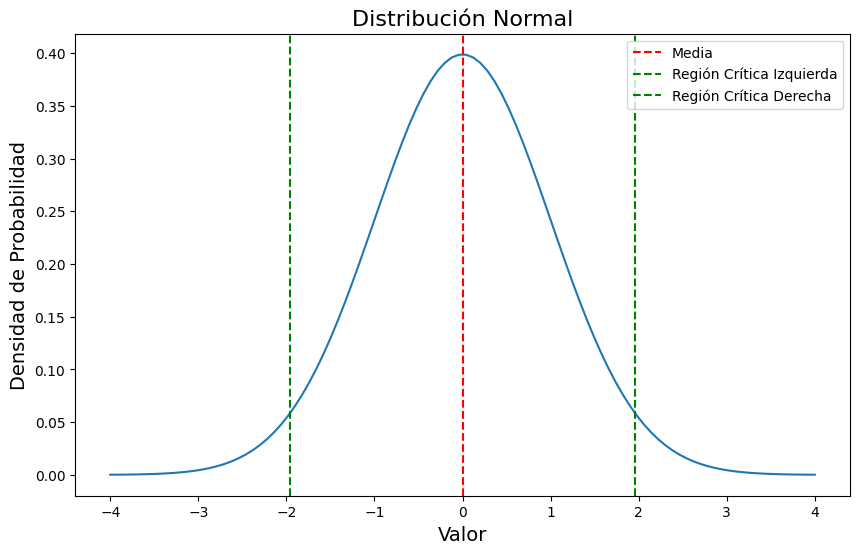

In [6]:
# Ejemplo 1: Prueba bilateral
mu = 0
sigma = 1
alpha = 0.05
region_critica = [-1.96, 1.96]

print("Ejemplo 1: Prueba Bilateral")
print("H0: mu = 0")
print("H1: mu != 0")
print("Nivel de significancia (alpha) =", alpha)
print("Región Crítica =", region_critica)

graficar_distribucion(mu, sigma, 'bilateral', region_critica)


Ejemplo 2: Prueba Unilateral Derecha
H0: mu <= 0
H1: mu > 0
Nivel de significancia (alpha) = 0.05
Región Crítica = 1.645


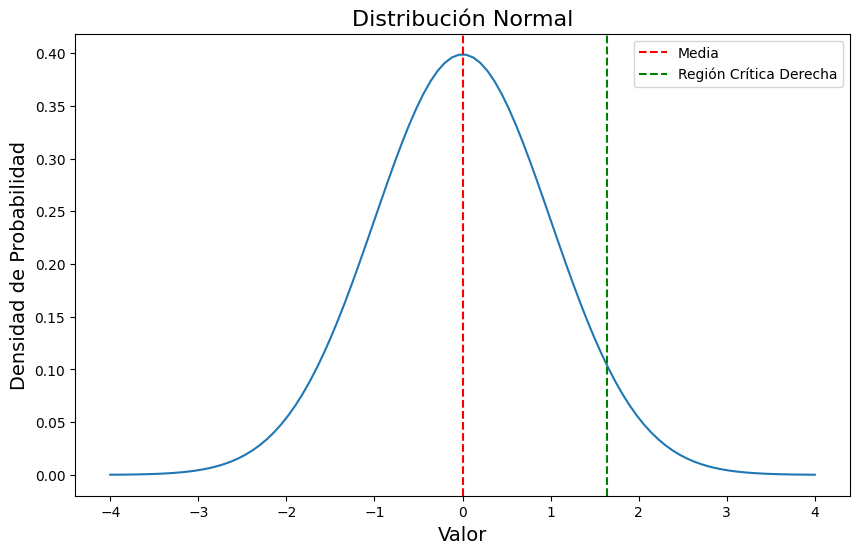

In [7]:
# Ejemplo 2: Prueba unilateral derecha
mu = 0
sigma = 1
alpha = 0.05
region_critica = 1.645

print("\nEjemplo 2: Prueba Unilateral Derecha")
print("H0: mu <= 0")
print("H1: mu > 0")
print("Nivel de significancia (alpha) =", alpha)
print("Región Crítica =", region_critica)

graficar_distribucion(mu, sigma, 'unilateral_derecha', region_critica)


Ejemplo 3: Prueba Unilateral Izquierda
H0: mu >= 0
H1: mu < 0
Nivel de significancia (alpha) = 0.05
Región Crítica = -1.645


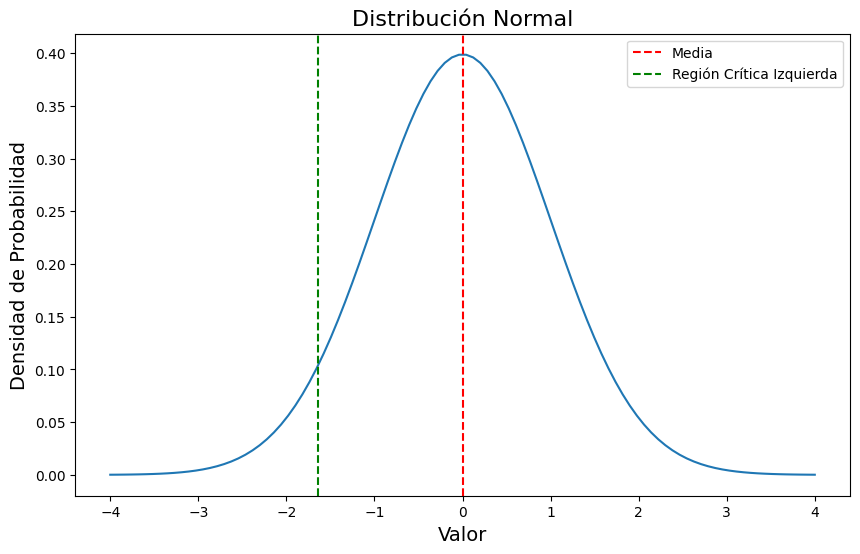

In [8]:
# Ejemplo 3: Prueba unilateral izquierda
mu = 0
sigma = 1
alpha = 0.05
region_critica = -1.645

print("\nEjemplo 3: Prueba Unilateral Izquierda")
print("H0: mu >= 0")
print("H1: mu < 0")
print("Nivel de significancia (alpha) =", alpha)
print("Región Crítica =", region_critica)

graficar_distribucion(mu, sigma, 'unilateral_izquierda', region_critica)

Valor crítico estandarizado (z): 1.64


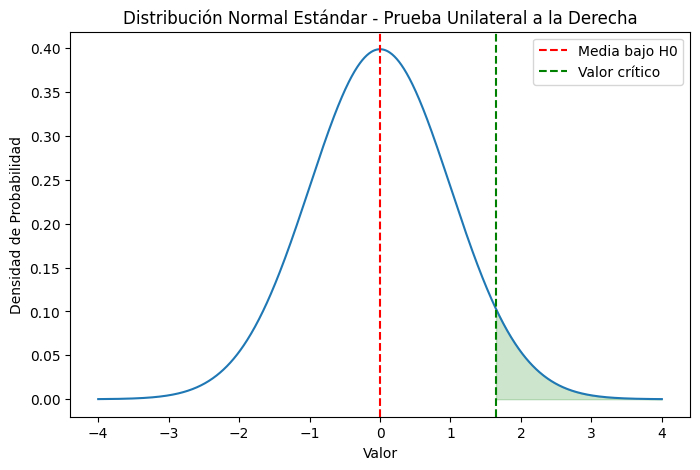

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
mu_0 = 0  # Media bajo la hipótesis nula (estandarizada)
sigma = 1  # Desviación estándar (estandarizada)
alpha = 0.05  # Nivel de significancia
alternativa = 'greater'  # Prueba unilateral a la derecha

# Calcular el valor crítico estandarizado
z_critico = norm.ppf(1 - alpha) #ppf distribucion de probabilidad acumulada, calcula el valor critico (z)

print(f"Valor crítico estandarizado (z): {z_critico:.2f}")

# Graficar la distribución normal estándar
x = np.linspace(mu_0 - 4 * sigma, mu_0 + 4 * sigma, 1000)
y = norm.pdf(x, loc=mu_0, scale=sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.axvline(x=mu_0, color='r', linestyle='--', label='Media bajo H0')
plt.axvline(x=z_critico, color='g', linestyle='--', label='Valor crítico')
plt.fill_between(x, 0, y, where=(x >= z_critico), color='g', alpha=0.2) #graficar la zona critica
plt.title('Distribución Normal Estándar - Prueba Unilateral a la Derecha')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

Valor crítico estandarizado izquierdo (z): -1.96
Valor crítico estandarizado derecho (z): 1.96


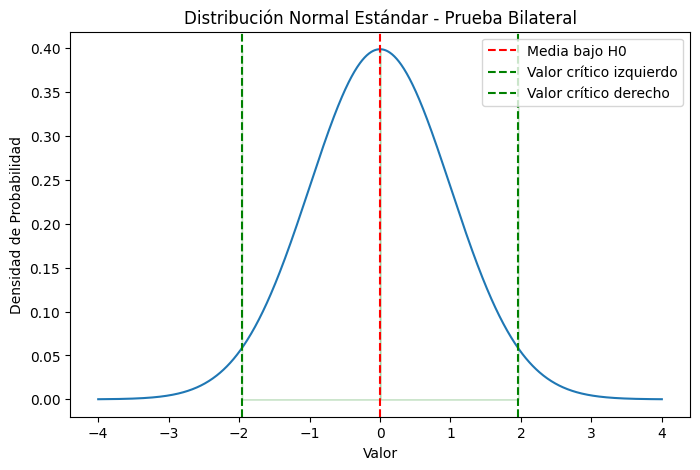

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
mu_0 = 0  # Media bajo la hipótesis nula (estandarizada)
sigma = 1  # Desviación estándar (estandarizada)
alpha = 0.05  # Nivel de significancia
alternativa = 'two-sided'  # Prueba bilateral

# Calcular los valores críticos estandarizados
z_critico_izq = -norm.ppf(1 - alpha / 2)
z_critico_der = norm.ppf(1 - alpha / 2)

print(f"Valor crítico estandarizado izquierdo (z): {z_critico_izq:.2f}")
print(f"Valor crítico estandarizado derecho (z): {z_critico_der:.2f}")

# Graficar la distribución normal estándar
x = np.linspace(mu_0 - 4 * sigma, mu_0 + 4 * sigma, 1000)
y = norm.pdf(x, loc=mu_0, scale=sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.axvline(x=mu_0, color='r', linestyle='--', label='Media bajo H0')
plt.axvline(x=z_critico_izq, color='g', linestyle='--', label='Valor crítico izquierdo')
plt.axvline(x=z_critico_der, color='g', linestyle='--', label='Valor crítico derecho')
plt.fill_betweenx(y, z_critico_izq, mu_0, color='g', alpha=0.2)
plt.fill_betweenx(y, mu_0, z_critico_der, color='g', alpha=0.2)
plt.title('Distribución Normal Estándar - Prueba Bilateral')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

Estadístico de prueba (t): -1.00
Valor crítico izquierdo (t): -2.05
Valor crítico derecho (t): 2.05


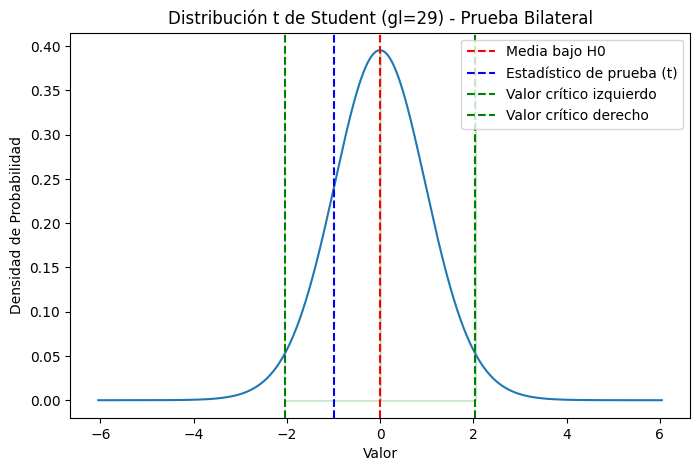

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp

# Datos de ejemplo
datos = np.random.normal(loc=5, scale=2, size=30)  # Generamos datos de ejemplo

# Parámetros
mu_0 = 5  # Media bajo la hipótesis nula
alpha = 0.05  # Nivel de significancia
alternativa = 'two-sided'  # Prueba bilateral

# Realizar la prueba t de una muestra
t_estadistico, p_valor = ttest_1samp(datos, mu_0)

# Calcular los grados de libertad
grados_libertad = len(datos) - 1

# Calcular los valores críticos con la distribución t de Student
t_critico_izq = t.ppf(alpha / 2, grados_libertad)
t_critico_der = t.ppf(1 - alpha / 2, grados_libertad)

print(f"Estadístico de prueba (t): {t_estadistico:.2f}")

print(f"Valor crítico izquierdo (t): {t_critico_izq:.2f}")
print(f"Valor crítico derecho (t): {t_critico_der:.2f}")


# Graficar la distribución t de Student
x = np.linspace(t_critico_izq - 4, t_critico_der + 4, 1000)
y = t.pdf(x, grados_libertad)

plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.axvline(x=0, color='r', linestyle='--', label='Media bajo H0')
plt.axvline(x=t_estadistico, color='b', linestyle='--', label='Estadístico de prueba (t)')
plt.axvline(x=t_critico_izq, color='g', linestyle='--', label='Valor crítico izquierdo')
plt.axvline(x=t_critico_der, color='g', linestyle='--', label='Valor crítico derecho')
plt.fill_betweenx(y, t_critico_izq, 0, color='g', alpha=0.2)
plt.fill_betweenx(y, 0, t_critico_der, color='g', alpha=0.2)
plt.title(f'Distribución t de Student (gl={grados_libertad}) - Prueba Bilateral')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

## Prueba de Hipótesis para la Media

Supongamos que una compañía de manufactura produce piezas metálicas y afirma que el peso promedio de las piezas es de 5 kg. Se toma una muestra aleatoria de 30 piezas y se obtienen los siguientes datos de peso (en kg):

In [12]:
pesos = [4.9, 5.2, 4.8, 5.1, 5.3, 4.7, 5.0, 5.4, 4.6, 5.2,
         5.1, 4.9, 5.3, 4.8, 5.0, 5.2, 4.7, 5.1, 5.4, 4.9,
         5.3, 4.8, 5.0, 5.1, 4.7, 5.2, 5.4, 4.6, 5.3, 4.8]

import numpy as np
from scipy.stats import ttest_1samp #prueba t student

# Calcular la media de la muestra
media_muestra = np.mean(pesos)
print(f"Media de la muestra: {media_muestra:.2f}")

# Prueba de hipótesis para la media
alpha = 0.05  # Nivel de significancia
media_nula = 5.0  # Media bajo la hipótesis nula

# Realizar la prueba t de una muestra, ya que la cantidad de muestras es es pequeña (n=30) y la desviacion estandar es desconocida
t_estadistico, p_valor = ttest_1samp(pesos, media_nula) #funcion que me permite el estadistico, por defecto realiza una pueba de hipotesis bilateral

print(f"Estadístico t: {t_estadistico:.2f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < alpha: #cae en zona de rechazo
    print("Se rechaza la hipótesis nula. La media de los pesos es diferente de 5.0 kg.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que la media de los pesos es diferente de 5.0 kg.")

Media de la muestra: 5.03
Estadístico t: 0.59
p-valor: 0.5621
No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que la media de los pesos es diferente de 5.0 kg.


## Caso de uso: Prueba de hipótesis unilateral superior para la media

Supongamos que una empresa de manufactura de baterías afirma que la duración media de sus baterías es de al menos 8 horas. Se toma una muestra aleatoria de 30 baterías y se mide su duración. Se desea probar si la duración media de las baterías es significativamente mayor que 8 horas.

Se establecen las hipótesis nula y alternativa:

H0: La duración media de las baterías es menor o igual a 8 horas.

H1: La duración media de las baterías es mayor que 8 horas.

In [13]:
import numpy as np
from scipy.stats import ttest_1samp

# Datos de duración de las baterías (en horas)
duraciones = [8.2, 7.9, 8.5, 8.1, 8.3, 7.8, 8.4, 8.6, 7.7, 8.2,
              8.4, 8.1, 8.3, 7.9, 8.2, 8.5, 7.8, 8.1, 8.6, 7.7,
              8.4, 8.0, 8.2, 8.3, 7.9, 8.1, 8.6, 7.8, 8.4, 8.0]

# Cálculo de la media muestral
media_muestral = np.mean(duraciones)
print(f"Media muestral de duración: {media_muestral:.2f} horas")

# Prueba de hipótesis unilateral superior
alpha = 0.05  # Nivel de significancia
media_nula = 8.0  # Media bajo la hipótesis nula

# Realizar la prueba t de una muestra
t_estadistico, p_valor = ttest_1samp(duraciones, media_nula, alternative='greater') # alternative='greater' -> prueba de hipotesis unilateral hacia la izquierda

print(f"Estadístico t: {t_estadistico:.2f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < alpha:
    print("Se rechaza la hipótesis nula. La duración media de las baterías es significativamente mayor que 8.0 horas.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que la duración media de las baterías es mayor que 8.0 horas.")

Media muestral de duración: 8.17 horas
Estadístico t: 3.32
p-valor: 0.0012
Se rechaza la hipótesis nula. La duración media de las baterías es significativamente mayor que 8.0 horas.


## Caso de uso: Prueba de hipótesis unilateral inferior para la proporción

En una encuesta sobre la preferencia de cierto producto, se entrevistó a 600 personas. La compañía espera que al menos el 70% de las personas prefiera su producto. Se desea probar si la proporción de personas que prefieren el producto es significativamente menor que 0.7.

Se establecen las hipótesis nula y alternativa:

H0: La proporción de personas que prefieren el producto es mayor o igual a 0.7.

H1: La proporción de personas que prefieren el producto es menor que 0.7.

In [15]:
import numpy as np
from scipy.stats import binomtest, norm

# Datos de la encuesta
n_total = 600  # Tamaño de la muestra
n_exito = 390  # Número de personas que prefieren el producto
prop_muestral = n_exito / n_total  # Proporción muestral

# Prueba de hipótesis unilateral inferior
alpha = 0.05  # Nivel de significancia
prop_nula = 0.7  # Proporción bajo la hipótesis nula

# # Realizar la prueba binomial
# p_valor = binom_test(n_exito, n_total, prop_nula, alternative='less')

# Calcular el estadístico de prueba
z_estadistico = (prop_muestral - prop_nula) / np.sqrt(prop_nula * (1 - prop_nula) / n_total)

# Calcular el p-valor utilizando la distribución normal
p_valor = norm.cdf(z_estadistico)

print(f"p-valor: {p_valor:.4f}")

if p_valor < alpha:
    print("Se rechaza la hipótesis nula. La proporción de personas que prefieren el producto es significativamente menor que 0.7.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción de personas que prefieren el producto es menor que 0.7.")

p-valor: 0.0038
Se rechaza la hipótesis nula. La proporción de personas que prefieren el producto es significativamente menor que 0.7.


## Prueba de Hipótesis para la Proporción

En una encuesta sobre preferencias políticas, se entrevistó a 500 personas y 220 de ellas dijeron que votarían por el Partido A en las próximas elecciones. Supongamos que la proporción esperada de votantes para el Partido A es del 40%. Podemos realizar una prueba de hipótesis para determinar si la proporción observada es significativamente diferente de la esperada.

In [16]:
import numpy as np
from scipy.stats import norm

# Datos de la encuesta
n_total = 500  # Tamaño de la muestra
n_exito = 220  # Número de personas que votarían por el Partido A
prop_muestral = n_exito / n_total  # Proporción muestral

# Establecer las hipótesis
prop_esperada = 0.4  # Proporción esperada bajo la hipótesis nula
alpha = 0.05  # Nivel de significancia

# Prueba de hipótesis para la proporción
print("Hipótesis nula (H0): La proporción de votantes para el Partido A es igual a 0.4.")
print("Hipótesis alternativa (H1): La proporción de votantes para el Partido A es diferente de 0.4.")

# Calcular el estadístico de prueba
z_estadistico = (prop_muestral - prop_esperada) / np.sqrt(prop_esperada * (1 - prop_esperada) / n_total) #FORMULA PARA CALCULAR EL ESTADISTICO Z

# Calcular el p-valor utilizando la distribución normal
p_valor = 2 * (1 - norm.cdf(abs(z_estadistico))) #funcion que me permite calcular el p_valor

print(f"\nProporción muestral: {prop_muestral:.4f}")
print(f"Proporción esperada (H0): {prop_esperada}")
print(f"Estadístico de prueba (z): {z_estadistico:.2f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < alpha:
    print("\nSe rechaza la hipótesis nula. La proporción de votantes para el Partido A es significativamente diferente de 0.4.")
else:
    print("\nNo se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción de votantes para el Partido A es diferente de 0.4.")

Hipótesis nula (H0): La proporción de votantes para el Partido A es igual a 0.4.
Hipótesis alternativa (H1): La proporción de votantes para el Partido A es diferente de 0.4.

Proporción muestral: 0.4400
Proporción esperada (H0): 0.4
Estadístico de prueba (z): 1.83
p-valor: 0.0679

No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción de votantes para el Partido A es diferente de 0.4.


## Prueba de Hipótesis para la Normalidad

Supongamos que tenemos una muestra de datos y queremos determinar si provienen de una distribución normal. Podemos realizar la prueba de Shapiro-Wilk para evaluar la normalidad de los datos.

Estadístico de prueba: 0.9869
p-valor: 0.0606
No se rechaza la hipótesis nula. Los datos podrían provenir de una distribución normal.


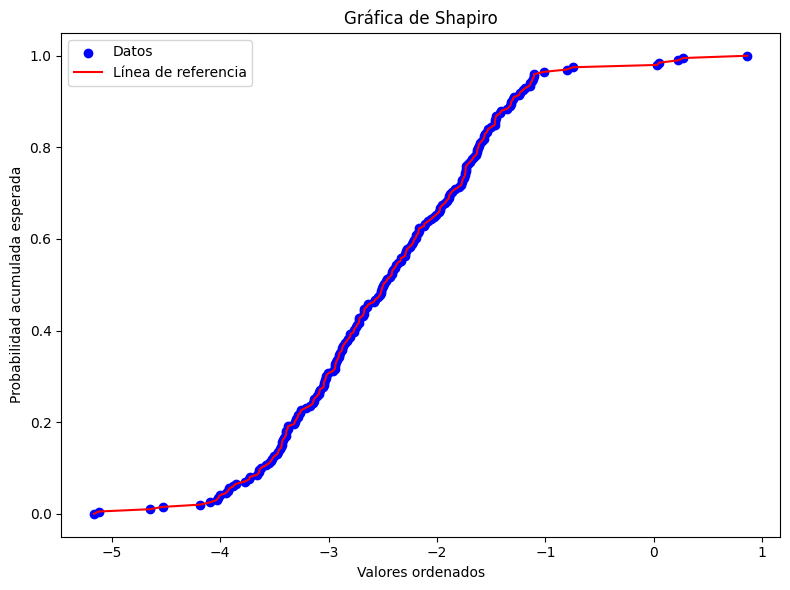

In [17]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generar datos sintéticos de Scikit-learn
X, _ = make_blobs(n_samples=200, centers=1, n_features=1, random_state=42)
datos = X.flatten()

# Prueba de normalidad de Shapiro-Wilk
alpha = 0.05  # Nivel de significancia
stat, p_valor = shapiro(datos)

print(f"Estadístico de prueba: {stat:.4f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < alpha:
    print("Se rechaza la hipótesis nula. Los datos no provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula. Los datos podrían provenir de una distribución normal.")

# Gráfica de Shapiro
plt.figure(figsize=(8, 6))
plt.scatter(np.sort(datos), np.linspace(0, 1, len(datos)), color='b', label='Datos')
plt.plot(np.sort(datos), np.linspace(0, 1, len(datos)), color='r', label='Línea de referencia')
plt.title("Gráfica de Shapiro")
plt.xlabel("Valores ordenados")
plt.ylabel("Probabilidad acumulada esperada")
plt.legend()
plt.tight_layout()
plt.show()

## AB Testing
Caso de Uso de AB Testing: Optimización de Página Web

Vamos a desarrollar un caso de uso de AB Testing en el contexto de optimización de una página web utilizando datos simulados. Usaremos datos de sklearn para crear un escenario similar a una tasa de conversión en marketing.

### Fase 1: Identificar el Objetivo

Objetivo: Incrementar la tasa de conversión en una página de destino mediante la implementación de un nuevo diseño de página.

### Fase 2: Definir Población Relevante

Población Relevante: Usuarios que visitan la página de destino. Para simplificar, asumimos que todos los usuarios son relevantes y representativos.

### Fase 3: Calcular Muestra Mínima

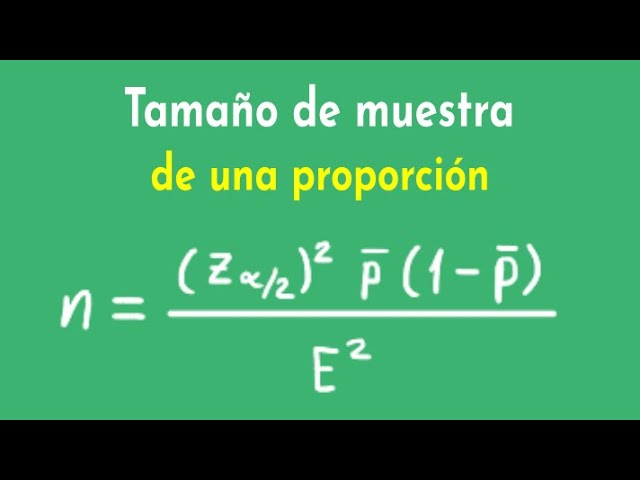

Suposiciones:

- Z α/2​ es el valor crítico del nivel de significancia.
- 𝑝^​ es la proporción esperada.
- 𝐸 es el margen de error.
- 𝑁 es el tamaño de la población.

### Fase 4: Identificar Variables de Control

Variables de Control:

- Número de visitas a la página
- Tiempo en la página
- Fuente de tráfico (orgánico, pago, etc.)

### Fase 5: Seleccionar y Validar Muestras

Utilizaremos datos simulados para generar muestras para los grupos A (control) y B (experimento).

### Fase 6: Medir y Analizar Resultados

Realizaremos la prueba de hipótesis utilizando una prueba Z para proporciones.


In [18]:
import numpy as np
from scipy import stats

def calcular_tamano_muestra_finitas(N, p_hat, alpha=0.05, E=0.01): #N numero de muestras
    Z_alpha = stats.norm.ppf(1 - alpha / 2)
    numerator = (Z_alpha**2) * p_hat * (1 - p_hat)
    denominator = E**2
    n_0 = numerator / denominator
    n = n_0 / (1 + (n_0 - 1) / N)
    return int(np.ceil(n))

In [19]:
# Parámetros
N = 1000  # Tamaño de la población
p_hat = 0.5  # Proporción esperada
alpha = 0.05  # Nivel de significancia
E = 0.03  # Margen de error

# Calcular tamaño de muestra
n = calcular_tamano_muestra_finitas(N, p_hat, alpha, E)
n

517

In [20]:
print("\nTamaño de muestra para estimar una proporción:")
proportion = 0.5
precision = 0.05
confidence_level = 1 - alpha
sample_size = sample_size_proportion(proportion, precision, confidence_level)
print(f"Proporción: {proportion}, Precisión: {precision}, Nivel de confianza: {confidence_level * 100}%")
print(f"Tamaño de muestra requerido: {sample_size}")


Tamaño de muestra para estimar una proporción:
Proporción: 0.5, Precisión: 0.05, Nivel de confianza: 95.0%
Tamaño de muestra requerido: 385


In [21]:
# Simulación de datos
np.random.seed(42)
n_A = n_B = n
data_A = np.random.binomial(1, p_hat, n_A)
data_B = np.random.binomial(1, p_hat + 0.02, n_B)  # Suponemos que la nueva proporción es ligeramente mayor

# Calcular proporciones
p_A = data_A.mean()
p_B = data_B.mean()

In [22]:
p_A

0.5222437137330754

In [23]:
p_B

0.5377176015473888